<a href="https://colab.research.google.com/github/DavideScassola/PML2024/blob/main/Notebooks/02_numpy_pandas_sklearn/021_numpy_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy exercises

Probabilistic Machine Learning -- Spring 2025, UniTS

### <ins>No loops allowed!<ins>
(also list comprehension is not allowed)

In [2]:
import numpy as np
np.random.seed(0)

## Exercise 1

Compute the empirical correlation coefficient between the given obsevations `x` and `y`:

$$\rho[x,y] = \frac{cov[x,y]}{\sigma_x \sigma_y}$$ 

### Solution

In [3]:
x = np.random.normal(0, 1, 1000)
y = 2*x + np.random.normal(0, 1, 1000)

In [4]:
(np.mean(x*y) - np.mean(x)*np.mean(y))/(np.std(x)*np.std(y))

0.8951815276982953

## Exercise 2

Define a function that computes the mean squared error between an array of observations `y` and an array of predictions `pred`:

$$MSE(y,\hat{y}) := \frac{1}{n} \sum_{i=1}^{n} (y - \hat{y})^2$$

In [5]:
y = np.random.normal(0, 1, 1000)
pred = y + np.random.normal(0, 0.4, 1000)

### Solution

In [6]:
def mse(pred, y):
    return np.mean((pred - y)**2)

mse(pred, y)

0.16515761104818244

## Exercise 3

Compute a matrix $M$ where $M_{i,j} := i \times j$ for $i \in \{1,\ldots,10\}$ and $j \in \{1,\ldots,10\}$

Hint: use broadcasting

### Solution

In [7]:
x = np.arange(1, 11) # creates an array of numbers from 1 to 10 
x.reshape(-1,1) * x.reshape(1,-1)

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]])

`x.reshape(-1,1)` transforms `x` into a matrix of `10` rows and `1` column; the first `-1` allows numpy to automatically infer the number of rows in which `x` should be replaced.

`x.reshape(-1,1)` is in fact completely equivalent to `x.reshape(10,1)` but requires smaller mental effort 👉🏻​ minor chance of errors.

The reason why $[1, ..., 10]^T \cdot [1, ..., 10]$ results in that matrix is just maths. 

## Exercise 4

Given the following matrix `x` of dimensions `(8,3)`, build a matrix `y` such that each row $y_i$ is made like this: 
$$
y_{i} = x_{2i} + x_{2i -1}
$$

where $x_{2i}$ is the $2i$-th row of matrix `x`.

In [8]:
x = np.arange(24).reshape(8,3)
x

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17],
       [18, 19, 20],
       [21, 22, 23]])

### Solution

First thing first, extract the $x_{2i}$ rows from `x` by `x[::2]` and the $x_{2i-1}$ by `x[1::2]`. 

In [9]:
print(x[::2])
print('-------------')
print(x[1::2])

[[ 0  1  2]
 [ 6  7  8]
 [12 13 14]
 [18 19 20]]
-------------
[[ 3  4  5]
 [ 9 10 11]
 [15 16 17]
 [21 22 23]]


Then we simply perform the sum between these two matrices:

In [10]:
x[::2] + x[1::2]

array([[ 3,  5,  7],
       [15, 17, 19],
       [27, 29, 31],
       [39, 41, 43]])

## Exercise 5

Write a function that given a scalar valued function `f`, an interval `[a,b]` and a number of steps `n` approximates $\int_a^b f(x) \ dx$ using the [trapezoidal rule](https://www.wikiwand.com/en/Trapezoidal_rule). Then test it on the following given function `g` in the interval `[-10,10]`.

Hint: use the function `np.linspace`

In [11]:
def g(x):
    return (x**3 - 2*x - x**5 * np.sin(x))*np.exp(-0.2*x**2)

def trapezoidal_rule(f, a, b, n):
    pass

### Solution

The trapezoidal rule is a method for approximating the integral of a function over an interval. The formula for the trapezoidal rule is given by:

$$
\int_a^b f(x) \, dx \approx \frac{b - a}{2n} \left[ f(a) + 2 \sum_{i=1}^{n-1} f(x_i) + f(b) \right]
$$

where:
- $f(x)$ is the function to be integrated.
- $[a, b]$ is the interval over which the integral is computed.
- $n$ is the number of subintervals (steps) used for approximation.
- $x_i$ are the points in the interval divided into $n$ subintervals: $x_i = a + i \cdot \Delta x$, where $\Delta x = \frac{b - a}{n}$.

1. Use `np.linspace(a, b, n+1)` to generate $n+1$ points from $a$ to $b$, including both endpoints.
2. Compute the function values $f(x_i)$ at these points.
3. Add the function values at the endpoints, double the sum of the internal points, and multiply by $\frac{b - a}{2n}$.


In [12]:
# Define a terrible function g
def g(x):
    return (x**3 - 2*x - x**5 * np.sin(x)) * np.exp(-0.2 * x**2)

In [13]:
def trapezoidal_rule(f, a, b, n):
    # Generate n+1 evenly spaced points between a and b
    x = np.linspace(a, b, n+1)
    
    # Evaluate the function at these points
    fx = f(x)
    
    # Apply the trapezoidal rule formula
    return (b - a) / (2 * n) * (fx[0] + 2 * np.sum(fx[1:-1]) + fx[-1])

In [14]:
# Test the function with g(x) on the interval [-10, 10] and 1000 steps
result = trapezoidal_rule(g, -10, 10, 1000)
print("Integral result:", result)

Integral result: 66.5338408862799


## Exercise 6

Given the following matrix `m` of size `(1000,5)` representing a set of n=`1000` observations having `5` features, compute the empirical correlation matrix:
$$ 
R = \frac{1}{n} X^t X 
$$
where $X$ is the standardized data (centered in 0, rescaled to 1).

Hint: use `.dot()` or `@` for matrix multiplication and `.T` for transposing

In [15]:
np.random.seed(0)
m = np.random.normal(0, 1, (1000,5)).cumsum(axis=1)

### Solution

**Step 1:** Standardize the data (center and scale wrt to columns, i.e. `axis=0`)

In [16]:
X = m - m.mean(axis=0)  # Center the data (subtract the mean of each column)
X /= X.std(axis=0)  # Rescale the data (divide by the standard deviation of each column)

**Step 2:** Compute the empirical correlation matrix

In [17]:
n = X.shape[0]  # Number of observations
R = (1 / n) * X.T.dot(X)

In [18]:
# Alternatively, you can use:
R = (1 / n) * (X.T @ X)

In [19]:
print(R)

[[1.         0.73660761 0.60843047 0.5365371  0.46740197]
 [0.73660761 1.         0.80336424 0.69783554 0.61593557]
 [0.60843047 0.80336424 1.         0.86287723 0.76180837]
 [0.5365371  0.69783554 0.86287723 1.         0.89561198]
 [0.46740197 0.61593557 0.76180837 0.89561198 1.        ]]


## Exercise 7

Compute a series of 1000 coordinates $(x_i,y_i)$ such that:
$(x_0,y_0) = (0,0)$ and $(x_{i+1},y_{i+1}) = (x_i + \epsilon^x_i ,y_i + \epsilon^y_i)$ where 

$\epsilon^x_i \sim \mathcal{N}(0,1)$ and $\epsilon^y_i \sim \mathcal{N}(0, 1)$

Then visualize it using the following function (`plot_random_walk`, that takes as input an `(n,2)` shaped array).

Hint: use the function `np.cumsum` 

In [4]:
import matplotlib.pyplot as plt
plt.figure(dpi=400)

def plot_random_walk(x):
    plt.plot(x[:,0], x[:,1], alpha=0.8)

<Figure size 2560x1920 with 0 Axes>

### Solution

To generate and visualize the series of `1000` coordinates $(x_i,y_i)$ according to the given recursive formula, we'll need to simulate two independent random walks in each of the $x$ and $y$ directions.

In [7]:
# Number of steps in the random walk
n = 1000

# Initialize the coordinates with the starting point (x0, y0) = (0, 0)
coords = np.zeros((n, 2))

# Generate random noise for each step for both x and y directions
epsilon_x = np.random.normal(0, 1, n)
epsilon_y = np.random.normal(0, 1, n)

# Update the coordinates based on the given recurrence relation
coords[:, 0] = np.cumsum(epsilon_x)
coords[:, 1] = np.cumsum(epsilon_y)

In [8]:
# Plot the random walk using the provided function
def plot_random_walk(x):
    plt.plot(x[:,0], x[:,1], alpha=0.8)

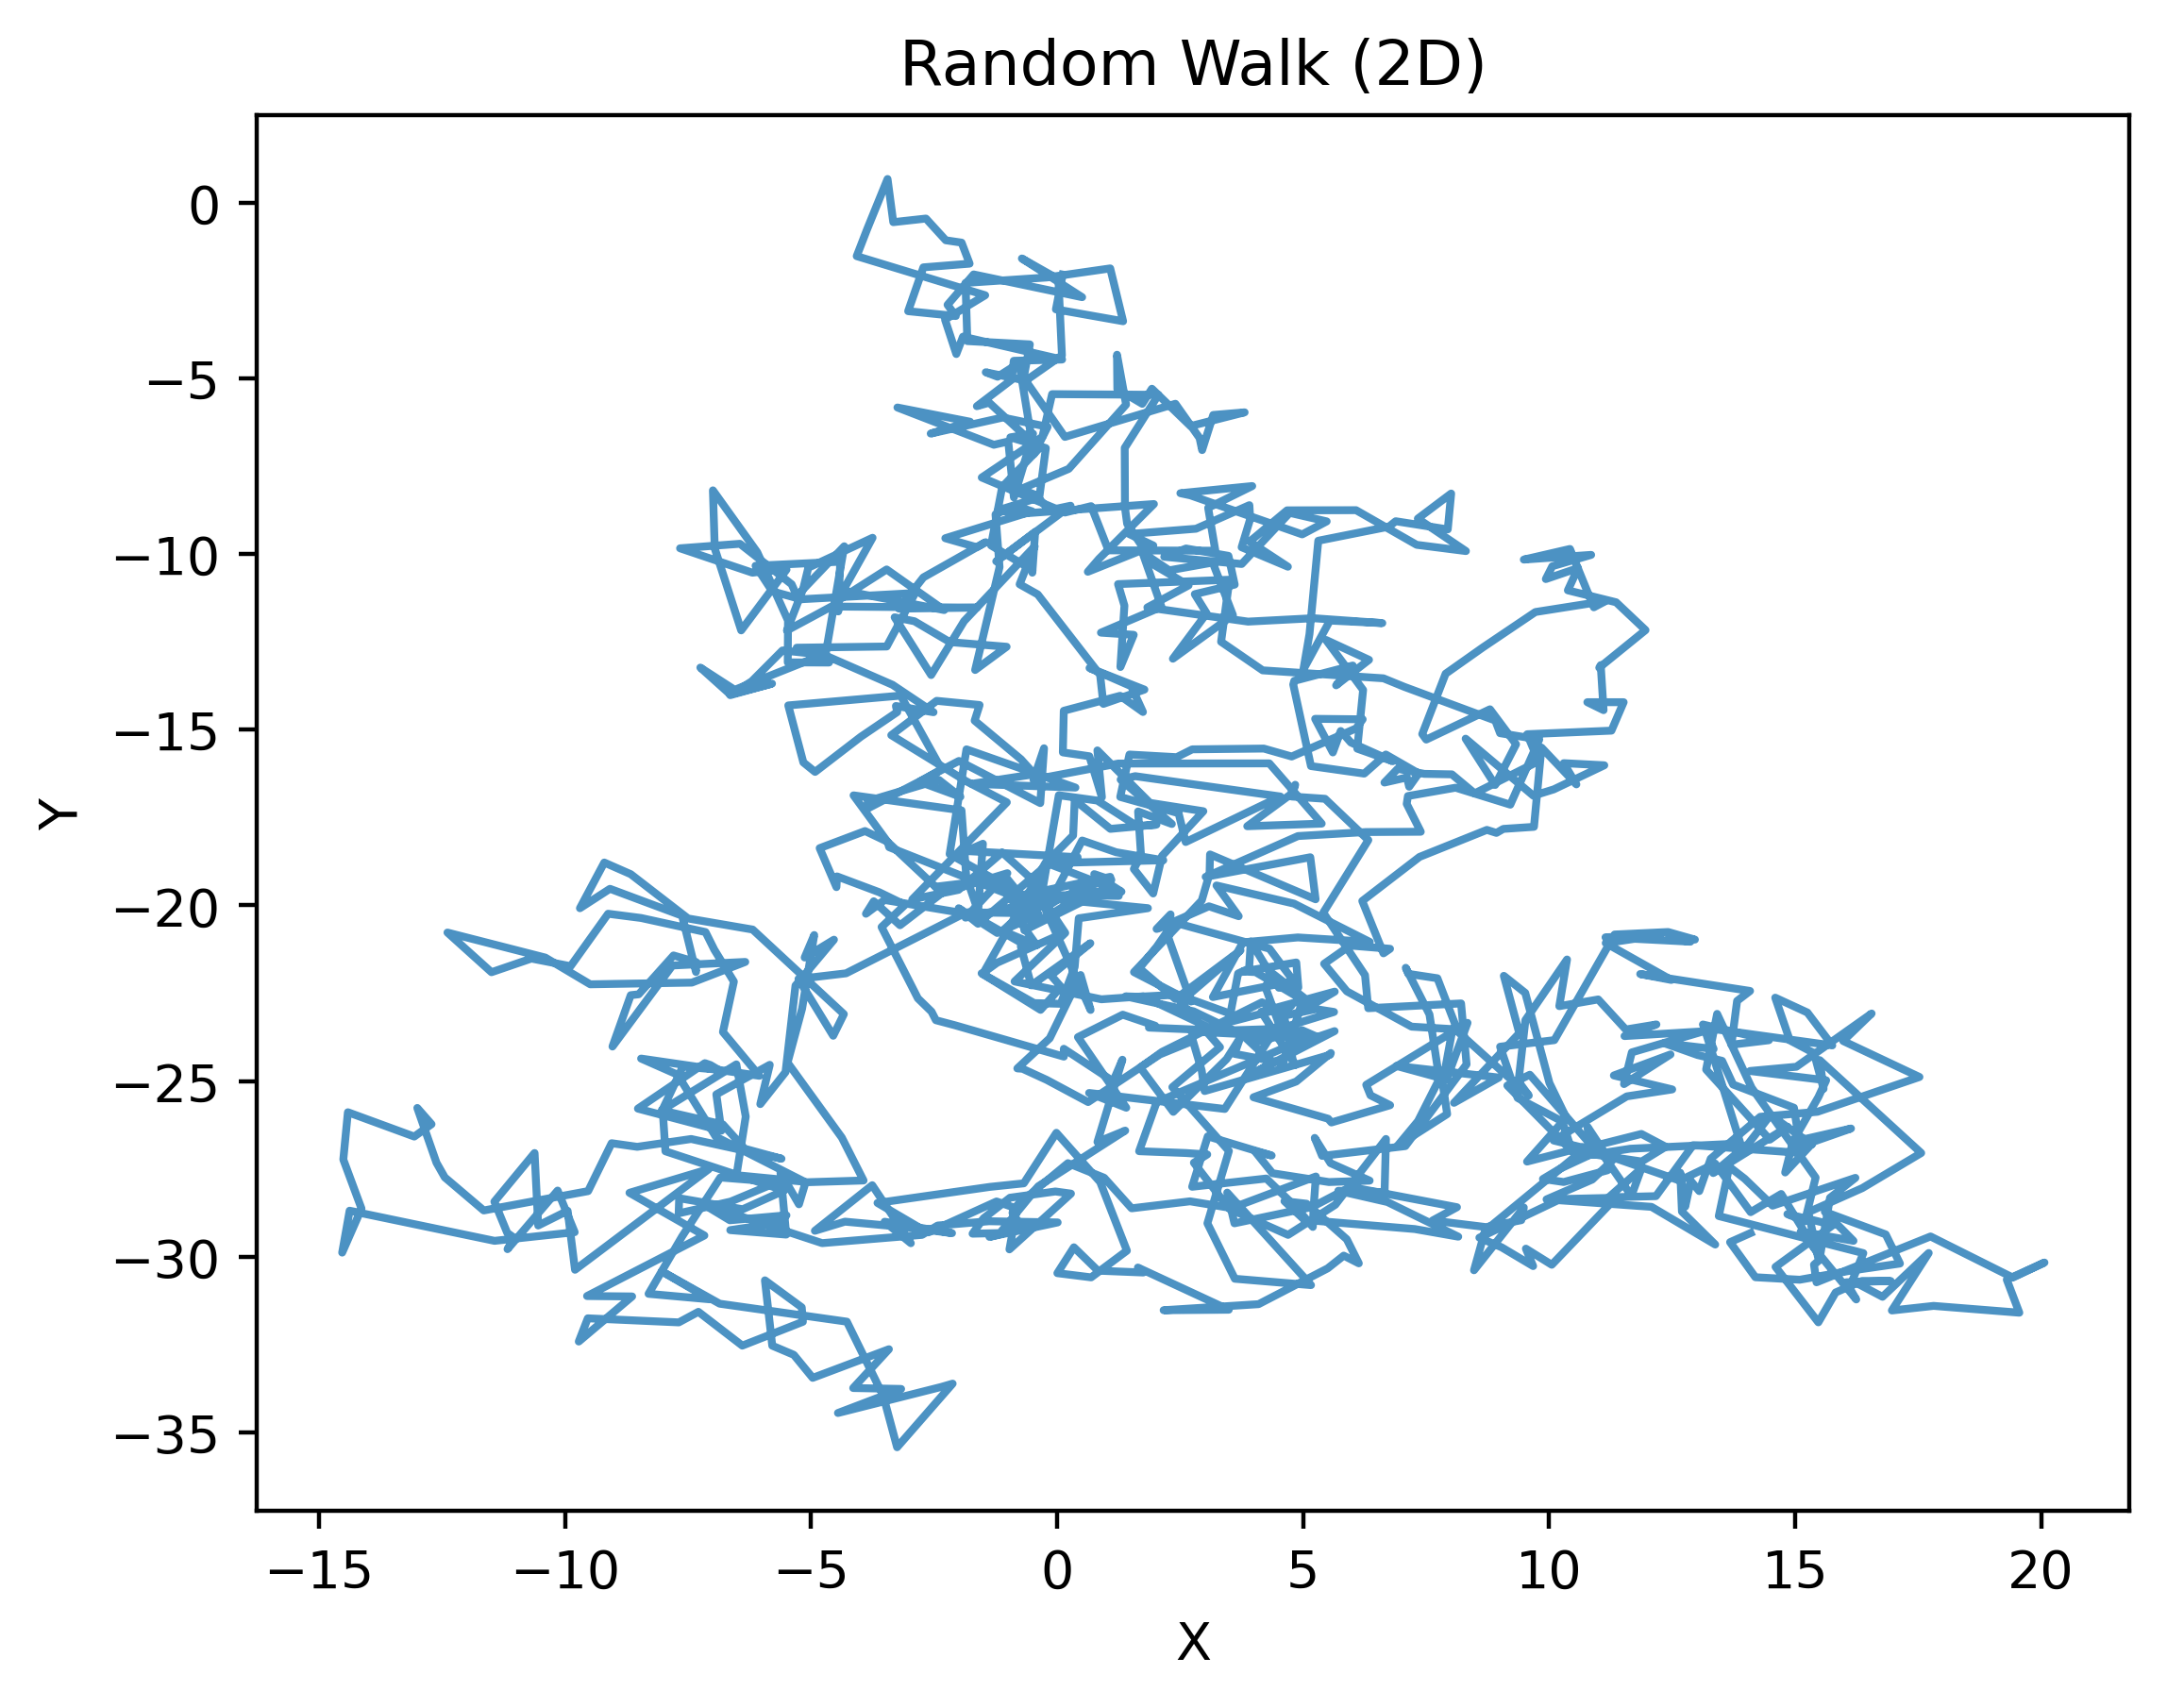

In [9]:
# Plotting the random walk
plt.figure(dpi=400)
plot_random_walk(coords)
plt.title("Random Walk (2D)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Exercise 8

Implement the [ReLU (rectified linear unit) activation function](https://www.wikiwand.com/en/Rectifier_(neural_networks)) in all the 3 ways showed in this formula:



<div style="background-color:white;">
    <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/1b43bb9d7f851aa7c8ce8e4dacbd943d18512528" width="600">
</div>

then appliy it to the given array `x` and verify that results are equal.

Hint: use `np.maximum`, `np.abs`, `np.where` for computing ReLu, use `==` and `np.all` for checking equality.

In [21]:
x = np.arange(10)-5

### Solution

In [22]:
# max(0, x)
relu_max = np.maximum(0, x)

In [23]:
# (x+|x|)/2
relu_abs = (x+np.abs(x))/2

In [24]:
# x if x>0; 0 otherwise
relu_where = np.where(x > 0, x, 0)

Now check whether or not they are equal using `==` AND `np.all` (`np.all` verifies whether all the elements in an array satisfy a certain condition).

In [25]:
are_equal = np.all(relu_max == relu_abs) and np.all(relu_max == relu_where)
are_equal

True

## Exercise 9

The entropy of a discrete distribution $p$ is defined as:

$$\text{H}[p] := -\mathbb{E}[\log{p}(x)]$$

compute it for the given array $p$ representing a discrete distribution.

In [10]:
p = np.array([0.1, 0.2, 0.0, 0.2, 0.5])

### Solution

In [12]:
def compute_entropy(p):
    # Ensure probabilities sum to 1 (valid distribution)
    p = np.array(p)
    p = p[p > 0]  # Ignore zero probabilities to avoid log(0)
    
    # Compute entropy using the formula
    entropy = -np.sum(p * np.log(p))
    return entropy

In [13]:
compute_entropy(p)

1.2206072645530175

## Exercise 10

The following array `price` with shape `(365, 7)` contains the prices of 7 different assets recorded at the end of 365 different days. The array `portfolio` of shape `(7,)` instead contains the amounts for each asset that you posses.

Compute:
- the total value of the portfolio $v_i$ at the end of each day
- the value difference between consecutive days $v_i - v_{i-1}$
- the value ratio between consecutive days $\frac{v_i}{v_{i-1}}$
- plot the price series of the third asset (using `plt.plot`)
- plot $v_i$ (using `plt.plot`)

In [13]:
import matplotlib.pyplot as plt
plt.figure(dpi=400)

def generate_prices(n):
    rng = np.random.default_rng(13)
    x = rng.normal(0,0.01,size=(n,7))
    x[:,0] = 0.3*x[:,0] + 0.8*x[:,1] + 0.3*x[:,2]
    x[:,4] = x[:,4] * 2
    x[:,5:] = x[:,5:] * 0.5
    x[:, 3] += 0.001
    x = np.exp(np.cumsum(x, axis=0))
    return x

x = generate_prices(365)

portfolio = np.array([12, 200, 100, 125, 50, 5, 100])

<Figure size 2400x1600 with 0 Axes>

### Solution